# Решающие деревья. Домашнее задание

## Что нужно сделать
Решите задачу классификации оттоковых клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора в ближайшее время или нет.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("sample_data/telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Датасет telecom_churn.csv содержит информацию о клиентах телекоммуникационной компании и их поведении, что позволяет анализировать отток клиентов. В таблице представлено 3333 строки и 20 столбцов, каждый из которых описывает определённые характеристики клиентов.

***Описание столбцов датасета:***

- State	Буквенный: код штата клиента
- Account length:	длительность обслуживания клиента в месяцах
- Area code:	префикс номера телефона
- International plan:	наличие международного роуминга (подключен/не подключен)
- Voice mail plan:	наличие голосовой почты (подключена/не подключена)
- Number vmail messages:	колиечество голосовых сообщений
- Total day minutes:	общее количество минут разговоров в течение дня
-Total day calls:	общее количество звонков в течение дня
-Total day charge:	общая стоимость звонков в течение дня
-Total eve minutes:	общее количество минут разговоров в вечернее время
-Total eve calls:	общее количество звонков в вечернее время
-Total eve charge:	общая стоимость звонков в вечернее время
-Total night minutes:	общее количество минут разговоров в ночное время
-Total night calls:	общее количество звонков в ночное время
-Total night charge:	общая стоимость звонков в ночное время
-Total intl minutes:	общее количество международных минут разговоров
-Total intl calls:	общее количество международных звонков
-Total intl charge:	общая стоимость международных звонков
-Customer service calls:	количество обращений в службу поддержки клиентов
-Churn:	признак оттока (1 – клиент ушёл, 0 – остался)



Сделайте первичную обработку данных:

1. Выбросите колонку State.

2. Колонки International plan и Voice mail plan закодируйте следующим образом: Yes замените на 1, а No на 0.

3. Переведите целевую переменную (Churn) в числа: True в 1, а False в 0.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
df = df.drop('State', axis=1)

In [ ]:
df['International plan'].value_counts()

,count
International plan,
No,3010
Yes,323


In [ ]:
df['International plan'] = df['International plan'].replace({'No': 0, 'Yes': 1}).astype(int)

<ipython-input-5-695a1d07a917>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['International plan'] = df['International plan'].replace({'No': 0, 'Yes': 1}).astype(int)


In [ ]:
df['Voice mail plan'].value_counts()

,count
Voice mail plan,
No,2411
Yes,922


In [ ]:
df['Voice mail plan'] = df['Voice mail plan'].replace({'No': 0, 'Yes': 1}).astype(int)

<ipython-input-7-089c69cd6133>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Voice mail plan'] = df['Voice mail plan'].replace({'No': 0, 'Yes': 1}).astype(int)


In [ ]:
df['Churn'].value_counts()

,count
Churn,
False,2850
True,483


In [ ]:
df['Churn'] = df['Churn'].replace({'False': 0, 'True': 1}).astype(int)

Выведите на экран первые строки изменённой таблицы, чтобы проверить, что все преобразования сработали.

In [ ]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Voice mail plan         3333 non-null   int64  
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total day charge        3333 non-null   float64
 8   Total eve minutes       3333 non-null   float64
 9   Total eve calls         3333 non-null   int64  
 10  Total eve charge        3333 non-null   float64
 11  Total night minutes     3333 non-null   float64
 12  Total night calls       3333 non-null   int64  
 13  Total night charge      3333 non-null   float64
 14  Total intl minutes      3333 non-null   

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
International plan,3333.0,0.096910,0.295879,0.00,0.00,0.00,0.00,1.00
Voice mail plan,3333.0,0.276628,0.447398,0.00,0.00,0.00,1.00,1.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00


Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
print("Матрица объект-признак X:")
print(X.head())
print("\nВектор целевой переменной y:")
print(y.head())

Матрица объект-признак X:
   Account length  Area code  International plan  Voice mail plan  \
0             128        415                   0                1   
1             107        415                   0                1   
2             137        415                   0                0   
3              84        408                   1                0   
4              75        415                   1                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47 

Проверьте баланс классов. Является ли выборка сбалансированной?

In [ ]:
# Определение целевой переменной y
y = df['Churn']

# Проверка баланса классов
class_counts = y.value_counts()

# Вывод результатов
print("Баланс классов:")
print(class_counts)

# Проверка на сбалансированность
total_counts = class_counts.sum()
proportions = class_counts / total_counts

print("\nДоля каждого класса:")
print(proportions)

# Определение сбалансированности
if proportions.max() > 0.7:
    print("\nВыборка несбалансирована.")
else:
    print("\nВыборка сбалансирована.")

Баланс классов:
Churn
0    2850
1     483
Name: count, dtype: int64

Доля каждого класса:
Churn
0    0.855086
1    0.144914
Name: count, dtype: float64

Выборка несбалансирована.


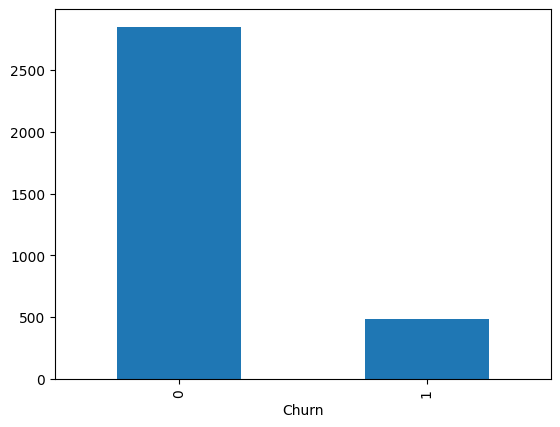

In [ ]:
y.value_counts().plot(kind='bar');

Разбейте данные на тренировочную и тестовую части, размер тестовой части — 30%.

In [ ]:
from sklearn.model_selection import train_test_split

# Разделение данных на тренировочную и тестовую части
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Проверка размеров полученных наборов данных
print(f"Размер тренировочной выборки X: {X_train.shape}")
print(f"Размер тестовой выборки X: {X_test.shape}")
print(f"Размер тренировочной выборки y: {y_train.shape}")
print(f"Размер тестовой выборки y: {y_test.shape}")

Размер тренировочной выборки X: (2333, 18)
Размер тестовой выборки X: (1000, 18)
Размер тренировочной выборки y: (2333,)
Размер тестовой выборки y: (1000,)


Для линейных моделей очень важно масштабирование признаков. Поэтому отмасштабируйте признаки при помощи [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [19]:
from sklearn.preprocessing import StandardScaler

# Масштабирование признаков с помощью StandardScaler
scaler = StandardScaler()

# Обучаем скейлер на тренировочных данных и применяем его к обеим выборкам
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Проверка размеров отмасштабированных наборов данных
print(f"Размер отмасштабированной тренировочной выборки X: {X_train_scaled.shape}")
print(f"Размер отмасштабированной тестовой выборки X: {X_test_scaled.shape}")

Размер отмасштабированной тренировочной выборки X: (2333, 18)
Размер отмасштабированной тестовой выборки X: (1000, 18)


После масштабирования признаков X_train и X_test перестали быть объектами типа pd.DataFrame, это неудобно. Приведите их снова к pd.DataFrame.

In [20]:
# Приведение отмасштабированных данных к типу DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Проверка размеров отмасштабированных наборов данных
print(f"Размер отмасштабированной тренировочной выборки X: {X_train_scaled_df.shape}")
print(f"Размер отмасштабированной тестовой выборки X: {X_test_scaled_df.shape}")

Размер отмасштабированной тренировочной выборки X: (2333, 18)
Размер отмасштабированной тестовой выборки X: (1000, 18)


In [23]:
X_train_scaled_df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,-0.511937,1.740454,-0.324289,-0.612192,-0.585483,0.410716,0.873749,0.410877,1.167102,-1.646317,1.167733,-0.456961,0.615443,-0.458282,-0.373682,0.226639,-0.379643,1.073319
1,-0.939002,1.740454,-0.324289,-0.612192,-0.585483,-0.864713,1.074874,-0.865095,-2.639021,-1.895351,-2.637901,-0.790790,1.075039,-0.789925,-0.122835,-0.997316,-0.127479,1.073319
2,0.392435,1.740454,-0.324289,1.633475,0.289180,0.752053,0.370935,0.752000,-0.984185,0.893834,-0.983076,-0.425542,-1.018675,-0.423373,-0.445353,0.634624,-0.446002,0.323378
3,-0.738030,-0.515843,-0.324289,-0.612192,-0.585483,1.814605,0.471498,1.814230,-0.211928,-1.646317,-0.211288,1.070799,-0.814411,1.069020,0.522200,1.042609,0.522840,-1.176504
4,0.492921,1.740454,-0.324289,1.633475,2.548723,-0.038896,0.823467,-0.039276,-0.509404,-1.496896,-0.510269,-0.773117,0.870774,-0.772470,0.450529,-0.181346,0.456481,-0.426563


In [24]:
X_test_scaled_df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,0.317071,1.740454,-0.324289,-0.612192,-0.585483,-0.459145,-0.383285,-0.459202,2.554012,0.296151,2.553707,-0.221317,1.177171,-0.222641,1.167234,-0.589331,1.173159,-0.426563
1,-0.838516,-0.515843,-0.324289,-0.612192,-0.585483,-1.301479,0.823467,-1.301214,0.323924,1.192675,0.324097,-0.240954,2.096363,-0.240096,0.916387,0.634624,0.920994,-1.176504
2,-0.059751,-0.515843,-0.324289,-0.612192,-0.585483,-3.303627,-5.059450,-3.303691,-0.814761,1.491516,-0.813885,-0.659222,-0.610146,-0.659013,-1.233728,-1.405302,-1.229039,1.823260
3,1.171201,-0.682096,-0.324289,-0.612192,-0.585483,0.601571,-1.087224,0.601949,0.061908,-0.450952,0.062199,-0.873266,0.666509,-0.872836,-0.015329,-0.997316,-0.021304,-0.426563
4,-0.109994,-0.682096,-0.324289,-0.612192,-0.585483,-0.661012,0.069247,-0.661069,0.467737,-1.347475,0.467793,0.530781,-0.456947,0.532282,-0.087000,1.042609,-0.087663,-0.426563


Обучите на тренировочных данных с параметрами по умолчанию:

1) логистическую регрессию;

2) метод опорных векторов (с kernel='linear').

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [26]:
# 1) Обучение логистической регрессии
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled_df, y_train)

# Предсказание на тестовых данных
y_pred_logistic = logistic_model.predict(X_test_scaled_df)

# Оценка модели логистической регрессии
print("Логистическая регрессия:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

Логистическая регрессия:
Accuracy: 0.862
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       857
           1       0.55      0.21      0.30       143

    accuracy                           0.86      1000
   macro avg       0.71      0.59      0.61      1000
weighted avg       0.83      0.86      0.83      1000



In [27]:
# 2) Обучение метода опорных векторов (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled_df, y_train)

# Предсказание на тестовых данных
y_pred_svm = svm_model.predict(X_test_scaled_df)

# Оценка модели SVM
print("\nМетод опорных векторов (SVM):")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Метод опорных векторов (SVM):
Accuracy: 0.857
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       857
           1       0.00      0.00      0.00       143

    accuracy                           0.86      1000
   macro avg       0.43      0.50      0.46      1000
weighted avg       0.73      0.86      0.79      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


С помощью обученных моделей сделайте предсказание на тестовых данных.

In [28]:
from sklearn.metrics import roc_auc_score

# Прдсказание выполнено пунком выше. Здесь оценка с помощью roc_auc_score

roc_auc_logistic = roc_auc_score(y_test, y_pred_logistic)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)

In [29]:
# Вывод результатов
print(f"ROC AUC для логистической регрессии: {roc_auc_logistic}")
print(f"ROC AUC для SVM (linear kernel): {roc_auc_svm}")

ROC AUC для логистической регрессии: 0.5903093406010559
ROC AUC для SVM (linear kernel): 0.5


Теперь обучите решающее дерево с параметрами по умолчанию на тренировочных данных, сделайте предсказание на тесте. Используйте метрику для оценки.

In [30]:
from sklearn.tree import DecisionTreeClassifier

# Обучение решающего дерева
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_scaled_df, y_train)

# Предсказание на тестовых данных
y_pred_tree = decision_tree_model.predict(X_test_scaled_df)

# Оценка модели решающего дерева
print("Решающее дерево:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Решающее дерево:
Accuracy: 0.915
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       857
           1       0.70      0.72      0.71       143

    accuracy                           0.92      1000
   macro avg       0.82      0.83      0.83      1000
weighted avg       0.92      0.92      0.92      1000



Нужно ли масшабировать признаки для обучения решающего дерева? Проверьте это, заново разбив данные на тренировочную и тестовую части (назовите новые полученные объекты новыми названиями), и проведите обучение, предсказание и оценку метрики до масштабирования и после.

In [31]:
# 1) Обучение без масштабирования

# Разделение данных на тренировочную и тестовую части (без масштабирования)
X_train_no_scale, X_test_no_scale, y_train_no_scale, y_test_no_scale = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение решающего дерева без масштабирования
decision_tree_model_no_scale = DecisionTreeClassifier()
decision_tree_model_no_scale.fit(X_train_no_scale, y_train_no_scale)

# Предсказание на тестовых данных (без масштабирования)
y_pred_tree_no_scale = decision_tree_model_no_scale.predict(X_test_no_scale)

# Оценка модели решающего дерева без масштабирования
print("Решающее дерево (без масштабирования):")
print("Accuracy:", accuracy_score(y_test_no_scale, y_pred_tree_no_scale))
print(classification_report(y_test_no_scale, y_pred_tree_no_scale))

Решающее дерево (без масштабирования):
Accuracy: 0.914
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       857
           1       0.68      0.74      0.71       143

    accuracy                           0.91      1000
   macro avg       0.82      0.84      0.83      1000
weighted avg       0.92      0.91      0.92      1000



In [32]:
# Оценка модели решающего дерева без масштабирования с помощью roc_auc_score
roc_auc_no_scaling = roc_auc_score(y_test, y_pred_tree_no_scale)
print(f'ROC AUC без масштабирования: {roc_auc_no_scaling}')

ROC AUC без масштабирования: 0.8420412726130345


In [33]:
# 2) Обучение с масштабированием

# Разделение данных на тренировочную и тестовую части (с масштабированием)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование признаков с помощью StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

# Обучение решающего дерева с масштабированием
decision_tree_model_scaled = DecisionTreeClassifier()
decision_tree_model_scaled.fit(X_train_scaled, y_train_scaled)

# Предсказание на тестовых данных (с масштабированием)
y_pred_tree_scaled = decision_tree_model_scaled.predict(X_test_scaled)

# Оценка модели решающего дерева с масштабированием
print("\nРешающее дерево (с масштабированием):")
print("Accuracy:", accuracy_score(y_test_scaled, y_pred_tree_scaled))
print(classification_report(y_test_scaled, y_pred_tree_scaled))


Решающее дерево (с масштабированием):
Accuracy: 0.908
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       857
           1       0.66      0.73      0.69       143

    accuracy                           0.91      1000
   macro avg       0.81      0.83      0.82      1000
weighted avg       0.91      0.91      0.91      1000



In [34]:
# Оценка модели решающего дерева с масштабированием с помощью roc_auc_score
roc_auc_with_scaling = roc_auc_score(y_test, y_pred_tree_scaled)
print(f'ROC AUC с масштабированием: {roc_auc_with_scaling}')

ROC AUC с масштабированием: 0.8327145433329797


Какая модель справилась с решением задачи?

**Результаты:**

1. Решающее дерево (без масштабирования):
- Accuracy: 0.914
- Precision для класса 0: 0.96
-Recall для класса 0: 0.94
-F1-score для класса 0: 0.95
-Precision для класса 1: 0.68
-Recall для класса 1: 0.74
-F1-score для класса 1: 0.71
-ROC AUC: 0.842
2. Решающее дерево (с масштабированием):
- Accuracy: 0.908
-Precision для класса 0: 0.95
-Recall для класса 0: 0.94
-F1-score для класса 0: 0.95
-Precision для класса 1: 0.66
-Recall для класса 1: 0.73
-F1-score для класса 1: 0.69
-ROC AUC: 0.833

***Выводы:***
- Accuracy (точность): модель без масштабирования имеет чуть более высокую точность (91.4%) по сравнению с моделью с масштабированием (90.8%). Это говорит о том, что модель без масштабирования лучше справляется с общей задачей предсказания.
- Precision и Recall: для класса 0 (клиенты, которые не ушли) обе модели показывают схожие результаты, но модель без масштабирования имеет немного более высокие значения precision и recall; для класса 1 (клиенты, которые ушли) модель без масштабирования также показывает лучшие результаты по precision (0.68 против 0.66) и recall (0.74 против 0.73).
- F1-score: F1-score для класса 1 у модели без масштабирования выше (0.71 против 0.69), что указывает на лучшую сбалансированность между precision и recall.
- ROC AUC: значение ROC AUC также выше у модели без масштабирования (0.842 против 0.833), что свидетельствует о лучшей способности модели различать классы.

**ИТОГ**

Сравнивая обе модели, можно сделать вывод, что модель дерева решений без масштабирования справилась с задачей лучше, чем модель с масштабированием, по всем основным метрикам: точности, precision, recall и ROC AUC.
Таким образом, в данном случае не требуется масштабирование признаков для обучения дерева решений, так как оно не влияет на его производительность в отрицательную сторону и может даже ухудшить её в некоторых случаях.